#Adversarial Diffusion Distillation

 # SDXL-Turbo, a lightning fast text-to image model.
 SDXL-Turbo is a **distilled** version of **SDXL 1.0**, trained for real-time synthesis. SDXL-Turbo is based on a novel training method called **Adversarial Diffusion Distillation (ADD)** , which allows sampling large-scale foundational image diffusion models in 1 to 4 steps at high image quality. This approach uses **score distillation** to leverage large-scale off-the-shelf image diffusion models as a teacher signal and combines this with an **adversarial loss** to ensure high image fidelity even in the low-step regime of one or two sampling steps.

#Diffusers

In [1]:
!pip uninstall transformers diffusers -y
!pip install transformers diffusers


Found existing installation: transformers 4.41.2
Uninstalling transformers-4.41.2:
  Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.6 MB/s eta 0:00:00


#Text-to-image:

Ite uses the "**AutoPipelineForText2Imag**e" model from the "diffusers" library to generate an image from text.

It loads a pre-trained model called **"sd-turbo**" and sets it up to run on the GPU.

Then, it provides a text prompt describing an image and generates the corresponding image..

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/1 [00:00<?, ?it/s]

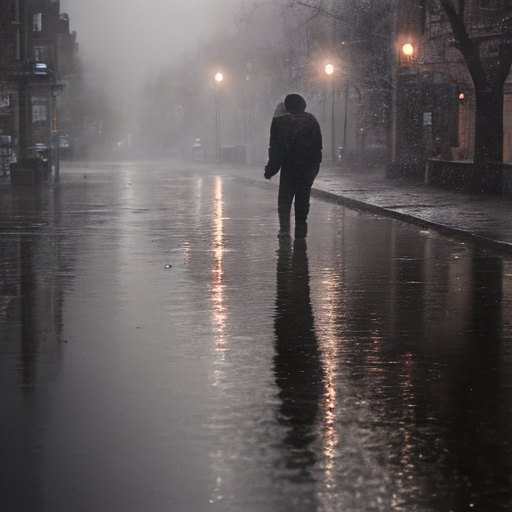

In [10]:
from diffusers import AutoPipelineForText2Image
import torch

pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sd-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

prompt = "A man walking on a rainy night with back to the camera, reflections in a water puddle, fog, 80mm"
image = pipe(prompt=prompt, num_inference_steps=1, guidance_scale=0.0).images[0]
display(image)


#Image-to-image:

It uses the Diffusers library to create an image-to-image transformation pipeline. It loads a pre-trained model **("stabilityai/sdxl-turbo")** for image generation and sets it to run on a GPU.

It loads an initial image of a cat, resizes it, and provides a prompt describing the desired image outcome.

The pipeline then generates an image based on the prompt and the initial image, controlling the inference steps, strength, and guidance scale.

Finally, it displays the generated image. Overall, it's a concise way to utilize AI to create customized images based on given inputs.

#Initial image Before Prompt

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/459 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/586 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/855 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/607 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

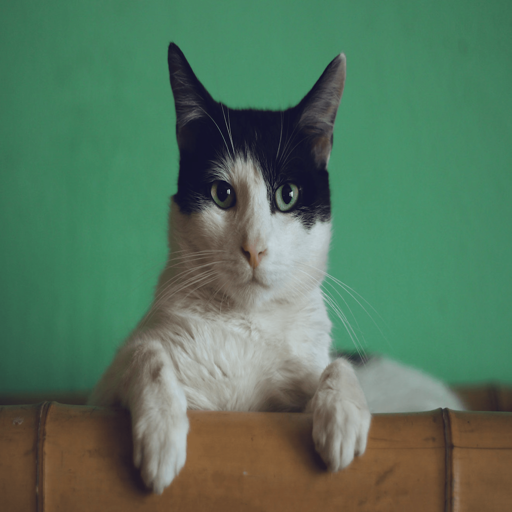

In [ ]:
from diffusers import AutoPipelineForImage2Image
from diffusers.utils import load_image
import torch
from IPython.display import display

# Load the Diffusers pipeline
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")

# Load the initial image of the cat
init_image = load_image("https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/diffusers/cat.png").resize((512, 512))

# Display the initial image of the cat
display(init_image)



#AFTER PROMPT

  0%|          | 0/1 [00:00<?, ?it/s]

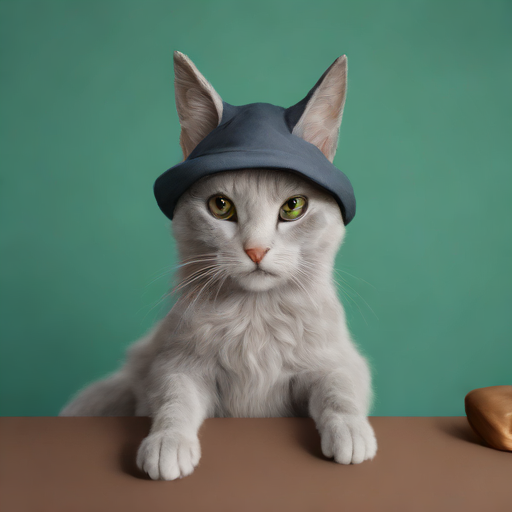

In [ ]:
# Set the prompt describing the desired image outcome
prompt = "cat wizard, gandalf, lord of the rings, detailed, fantasy, cute, adorable, Pixar, Disney, 8k"

# Generate the image based on the prompt and initial image
image = pipe(prompt, image=init_image, num_inference_steps=2, strength=0.5, guidance_scale=0.0).images[0]

# Display the generated image
display(image)


In [ ]:
!pip install streamlit-keyup

In [ ]:
!pip install streamlit

In [ ]:
!streamlit run /content/drive/MyDrive/generative-models-main/scripts/demo/turbo.py

#SDXL: Improving Latent Diffusion Models for High-Resolution Image Synthesis

#SDXL-1.0:

SDXL is a new model that creates images from text descriptions. It's an improved version of Stable Diffusion, with a larger backbone called UNet, which makes it better at understanding and generating images.

The model has more parameters because it pays more attention to details and can understand text better. It also uses new methods to make sure the images match the text descriptions well, and it can work with different shapes of images.

Additionally, there's a refinement step that makes the generated images look even better. SDXL outperforms previous versions and is as good as other advanced image generators.

In [ ]:
!pip install invisible_watermark transformers accelerate safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 14.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

#Using the base model

It installs necessary packages, then sets up a Diffusion pipeline, a type of AI model for generating images from prompts. It uses a specific pre-trained model (`stabilityai/stable-diffusion-xl-base-1.0`) optimized for speed and safety with reduced precision.

After configuring the pipeline to use GPU acceleration, it generates an image based on the provided prompt ("An astronaut riding a green horse").



In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
#pipe = pipe.enable_model_cpu_offload()

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]

# Display the image
display(images)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

#using the refiner to improve images -style transfer, inpainting, or guided image editing.

It uses the Stable Diffusion XL model to generate an image based on a text prompt and an initial image.

It loads a pre-trained model to run on a CUDA-enabled GPU, fetches an initial image from a URL, and generates a new image based on the prompt "a photo of an astronaut riding a horse on mars."

Finally, it displays the generated image using Matplotlib, turning off the axis labels for a cleaner presentation.

In [ ]:
import torch
from diffusers import StableDiffusionXLImg2ImgPipeline
from diffusers.utils import load_image
from IPython.display import display
import matplotlib.pyplot as plt


pipe = StableDiffusionXLImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-refiner-1.0", torch_dtype=torch.float16, variant="fp16", use_safetensors=True
)
pipe = pipe.to("cuda")
url = "https://huggingface.co/datasets/patrickvonplaten/images/resolve/main/aa_xl/000000009.png"

init_image = load_image(url).convert("RGB")
prompt = "a photo of an astronaut riding a horse on mars"
image = pipe(prompt, image=init_image).images

# Display the RGB image using Matplotlib
plt.imshow(image[0])
plt.axis('off')  # Turn off axis labels
plt.show()
